In [1]:
import math
from datetime import timedelta
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

import parcels


In [2]:
example_dataset_folder = parcels.download_example_dataset("MovingEddies_data")

fieldset = parcels.FieldSet.from_parcels(f"{example_dataset_folder}/moving_eddies")

print(fieldset)

<FieldSet>
    fields:
        <Field>
            name            : 'U'
            grid            : RectilinearZGrid(lon=array([ 0.00,  2010.05,  4020.10, ...,  395979.91,  397989.94,  400000.00], shape=(200,), dtype=float32), lat=array([ 0.00,  2005.73,  4011.46, ...,  695988.56,  697994.25,  700000.00], shape=(350,), dtype=float32), time=array([ 0.00,  86400.00,  172800.00, ...,  432000.00,  518400.00,  604800.00], shape=(8,)), time_origin=0.0, mesh='flat')
            extrapolate time: False
            time_periodic   : False
            gridindexingtype: 'nemo'
            to_write        : False
        <Field>
            name            : 'V'
            grid            : RectilinearZGrid(lon=array([ 0.00,  2010.05,  4020.10, ...,  395979.91,  397989.94,  400000.00], shape=(200,), dtype=float32), lat=array([ 0.00,  2005.73,  4011.46, ...,  695988.56,  697994.25,  700000.00], shape=(350,), dtype=float32), time=array([ 0.00,  86400.00,  172800.00, ...,  432000.00,  518400.00, 

In [3]:
pset = parcels.ParticleSet.from_list(
    fieldset=fieldset,  # the fields on which the particles are advected
    pclass=parcels.JITParticle,  # the type of particles (JITParticle or ScipyParticle)
    lon=[3.3e5, 3.3e5],  # a vector of release longitudes
    lat=[1e5, 2.8e5],  # a vector of release latitudes
)

In [4]:
print(pset)

<ParticleSet>
    fieldset   :
        <FieldSet>
            fields:
                <Field>
                    name            : 'U'
                    grid            : RectilinearZGrid(lon=array([ 0.00,  2010.05,  4020.10, ...,  395979.91,  397989.94,  400000.00], shape=(200,), dtype=float32), lat=array([ 0.00,  2005.73,  4011.46, ...,  695988.56,  697994.25,  700000.00], shape=(350,), dtype=float32), time=array([ 0.00,  86400.00,  172800.00, ...,  432000.00,  518400.00,  604800.00], shape=(8,)), time_origin=0.0, mesh='flat')
                    extrapolate time: False
                    time_periodic   : False
                    gridindexingtype: 'nemo'
                    to_write        : False
                <Field>
                    name            : 'V'
                    grid            : RectilinearZGrid(lon=array([ 0.00,  2010.05,  4020.10, ...,  395979.91,  397989.94,  400000.00], shape=(200,), dtype=float32), lat=array([ 0.00,  2005.73,  4011.46, ...,  695988.56,

In [5]:
# To plot the positions of these particles on the zonal velocity, use the following command
plt.pcolormesh(fieldset.U.grid.lon, fieldset.U.grid.lat, fieldset.U.data[0, :, :])
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.colorbar()

plt.plot(pset.lon, pset.lat, "ko")
plt.show()

RuntimeError: Field is in deferred_load mode, so can't be accessed. Use .computeTimeChunk() method to force loading of data

In [6]:
output_file = pset.ParticleFile(
    name="EddyParticles.zarr",  # the file name
    outputdt=timedelta(hours=1),  # the time step of the outputs
)

print(output_file)

ParticleFile(name='EddyParticles.zarr', particleset=<parcels.particleset.ParticleSet object at 0x7f2ef55567b0>, outputdt=3600.0, chunks=None, create_new_zarrfile=True)


In [7]:
# Dont need to run this more than once for this example

# pset.execute(
#     parcels.AdvectionRK4,  # the kernel (which defines how particles move)
#     runtime=timedelta(days=6),  # the total length of the run
#     dt=timedelta(minutes=5),  # the timestep of the kernel
#     output_file=output_file,
# )

INFO: Output files are stored in EddyParticles.zarr.
100%|██████████| 518400.0/518400.0 [00:19<00:00, 26034.21it/s]


<ParticleSet>
    fieldset   :
        <FieldSet>
            fields:
                <Field>
                    name            : 'U'
                    grid            : RectilinearZGrid(lon=array([ 0.00,  2010.05,  4020.10, ...,  395979.91,  397989.94,  400000.00], shape=(200,), dtype=float32), lat=array([ 0.00,  2005.73,  4011.46, ...,  695988.56,  697994.25,  700000.00], shape=(350,), dtype=float32), time=array([ 432000.00,  518400.00]), time_origin=0.0, mesh='flat')
                    extrapolate time: False
                    time_periodic   : False
                    gridindexingtype: 'nemo'
                    to_write        : False
                <Field>
                    name            : 'V'
                    grid            : RectilinearZGrid(lon=array([ 0.00,  2010.05,  4020.10, ...,  395979.91,  397989.94,  400000.00], shape=(200,), dtype=float32), lat=array([ 0.00,  2005.73,  4011.46, ...,  695988.56,  697994.25,  700000.00], shape=(350,), dtype=float32), tim

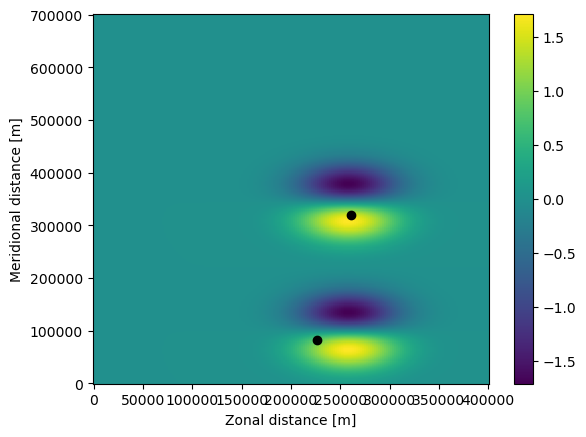

In [8]:
print(pset)

plt.pcolormesh(fieldset.U.grid.lon, fieldset.U.grid.lat, fieldset.U.data[0, :, :])
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.colorbar()

plt.plot(pset.lon, pset.lat, "ko")
plt.show()

/tmp/ipykernel_1420879/1824423471.py:4: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_zarr("EddyParticles.zarr")


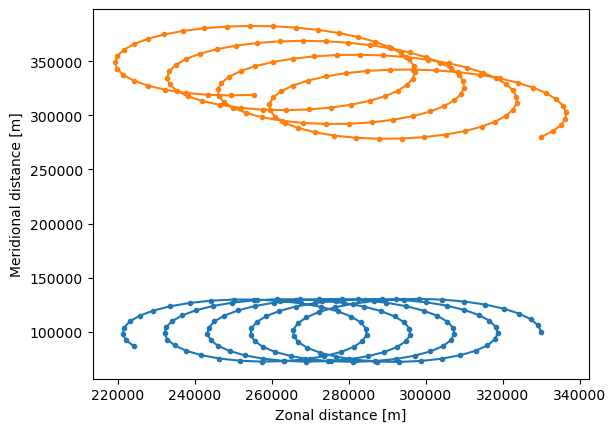

In [9]:
# The trajectories in the EddyParticles.zarr file can be quickly plotted using xr.open_zarr() 
# (note that the lon and lat arrays need to be transposed with .T).

ds = xr.open_zarr("EddyParticles.zarr")

plt.plot(ds.lon.T, ds.lat.T, ".-")
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.show()

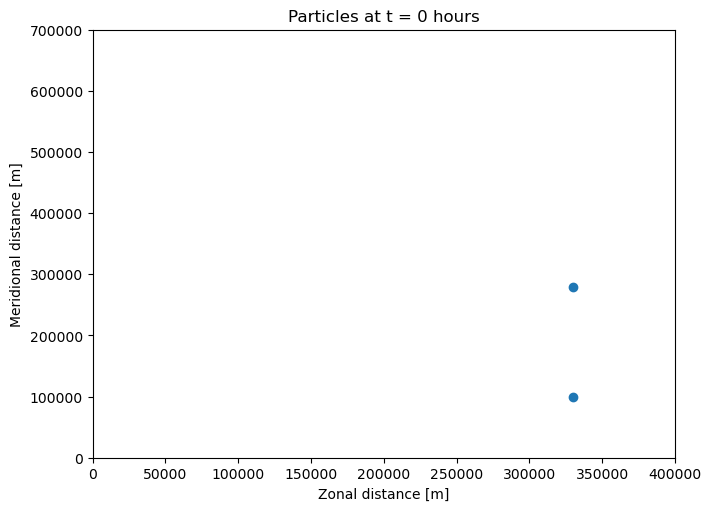

In [12]:
# Using the FuncAnimation() method, we can show the trajectories as an animation and watch 
# the particles go!

# %%capture
fig = plt.figure(figsize=(7, 5), constrained_layout=True)
ax = fig.add_subplot()

ax.set_ylabel("Meridional distance [m]")
ax.set_xlabel("Zonal distance [m]")
ax.set_xlim(0, 4e5)
ax.set_ylim(0, 7e5)

# show only every fifth output (for speed in creating the animation)
timerange = np.unique(ds["time"].values)[::5]

# Indices of the data where time = 0
time_id = np.where(ds["time"] == timerange[0])

sc = ax.scatter(ds["lon"].values[time_id], ds["lat"].values[time_id])

t = str(timerange[0].astype("timedelta64[h]"))
title = ax.set_title(f"Particles at t = {t}")


def animate(i):
    t = str(timerange[i].astype("timedelta64[h]"))
    title.set_text(f"Particles at t = {t}")

    time_id = np.where(ds["time"] == timerange[i])
    sc.set_offsets(np.c_[ds["lon"].values[time_id], ds["lat"].values[time_id]])


anim = FuncAnimation(fig, animate, frames=len(timerange), interval=100)
HTML(anim.to_jshtml())

Adding a custom behaviour kernel

In [13]:
# In this example, we’ll create a simple kernel where particles obtain an extra 2 m/s westward 
# velocity after 1 day. Of course, this is not very realistic scenario, but it nicely illustrates 
# the power of custom kernels.

def WestVel(particle, fieldset, time):
    if time > 86400:
        uvel = -2.0
        particle_dlon += uvel * particle.dt



# Note that in the Kernel above, we update particle_dlon, and not particle.lon directly. 
# This is because of the particular way in which particle locations are updated; see also 
# the tutorial on the particle Kernel loop.

In [14]:
# Now reset the ParticleSet again, and re-execute. Note that we have now changed the first 
# argument of pset.execute() to be a list of [AdvectionRK4, WestVel].

pset = parcels.ParticleSet.from_list(
    fieldset=fieldset, pclass=parcels.JITParticle, lon=[3.3e5, 3.3e5], lat=[1e5, 2.8e5]
)

output_file = pset.ParticleFile(
    name="EddyParticles_WestVel.zarr", outputdt=timedelta(hours=1)
)
pset.execute(
    [parcels.AdvectionRK4, WestVel],  # simply combine the Kernels in a list
    runtime=timedelta(days=2),
    dt=timedelta(minutes=5),
    output_file=output_file,
)

INFO: Output files are stored in EddyParticles_WestVel.zarr.
100%|██████████| 172800.0/172800.0 [00:06<00:00, 27078.70it/s]


/tmp/ipykernel_1420879/1603072820.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_zarr("EddyParticles_WestVel.zarr")


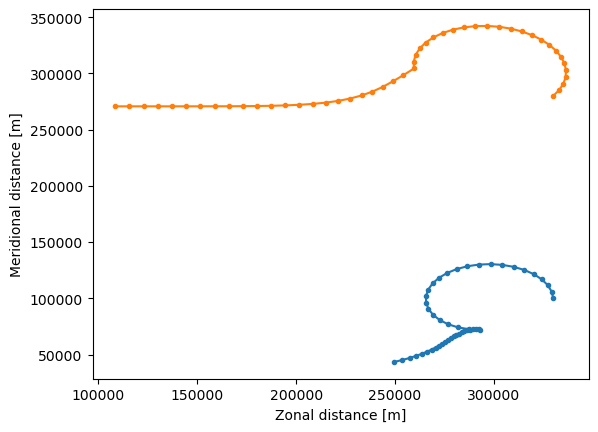

In [16]:
ds = xr.open_zarr("EddyParticles_WestVel.zarr")

plt.plot(ds.lon.T, ds.lat.T, ".-")
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.show()

Reading in data from NetCDF files

In [17]:
# In most cases, you will want to advect particles within pre-computed velocity fields. 
# If these velocity fields are stored in NetCDF format, it is fairly easy to load them 
# into the FieldSet.from_netcdf() function.

# The examples directory contains a set of GlobCurrent files of the region around South 
# Africa.

# First, define the names of the files containing the zonal (U) and meridional (V) 
# velocities. You can use wildcards (*) and the filenames for U and V can be the same 
# (as in this case).

example_dataset_folder = parcels.download_example_dataset("GlobCurrent_example_data")

filenames = {
    "U": f"{example_dataset_folder}/20*.nc",
    "V": f"{example_dataset_folder}/20*.nc",
}

In [18]:
# Then, define a dictionary of the variables (U and V) and dimensions (lon, lat and time; 
# note that in this case there is no depth because the GlobCurrent data is only for the 
# surface of the ocean).

variables = {
    "U": "eastward_eulerian_current_velocity",
    "V": "northward_eulerian_current_velocity",
}
dimensions = {"lat": "lat", "lon": "lon", "time": "time"}

# Finally, read in the fieldset using the FieldSet.from_netcdf function with the 
# above-defined filenames, variables and dimensions.

fieldset = parcels.FieldSet.from_netcdf(filenames, variables, dimensions)

In [19]:
# Now define a ParticleSet, in this case with 5 particle starting on a line between 
# (28E, 33S) and (30E, 33S) using the ParticleSet.from_line constructor method.

pset = parcels.ParticleSet.from_line(
    fieldset=fieldset,
    pclass=parcels.JITParticle,
    size=5,  # releasing 5 particles
    start=(28, -33),  # releasing on a line: the start longitude and latitude
    finish=(30, -33),  # releasing on a line: the end longitude and latitude
)

In [20]:
# And finally execute the ParticleSet for 10 days using 4th order Runge-Kutta.

output_file = pset.ParticleFile(
    name="GlobCurrentParticles.zarr", outputdt=timedelta(hours=6)
)
pset.execute(
    parcels.AdvectionRK4,
    runtime=timedelta(days=10),
    dt=timedelta(minutes=5),
    output_file=output_file,
)

INFO: Output files are stored in GlobCurrentParticles.zarr.
100%|██████████| 864000.0/864000.0 [00:04<00:00, 174186.52it/s]


/home/gwatts/miniforge3/envs/analysis-grace/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://www.ngdc.noaa.gov/mgg/shorelines/data/gshhs/latest/gshhg-shp-2.3.7.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


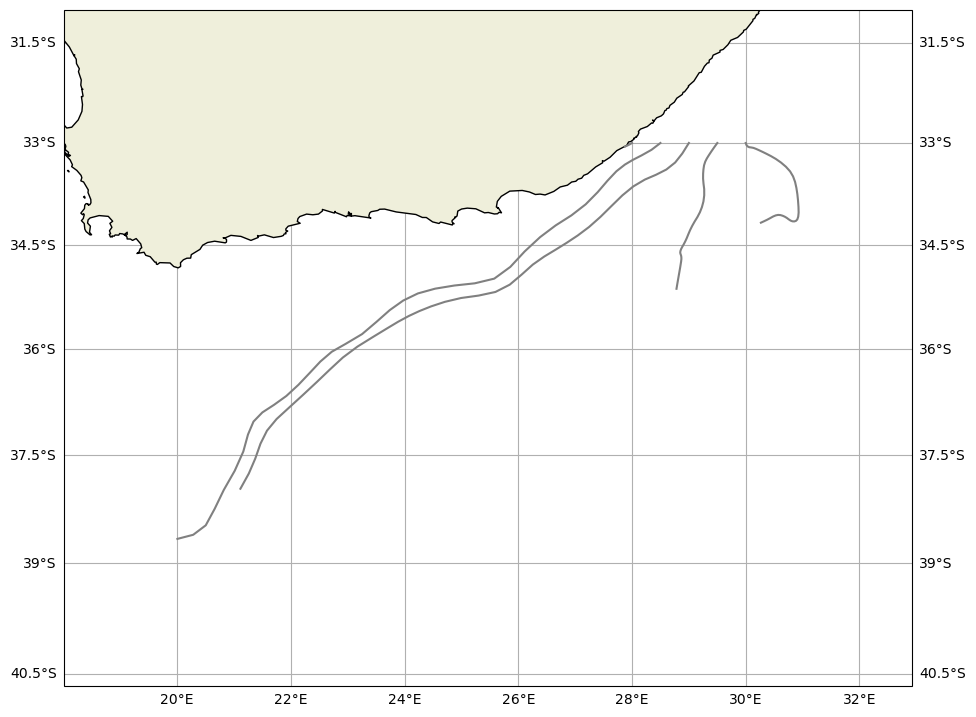

In [21]:
# Because the GlobCurrent data represents the ‘real’ ocean, we can use the trajan package to
#  visualize this simulation. Use ds.traj.plot() to plot the trajectories.

ds = xr.open_zarr("GlobCurrentParticles.zarr")
ds.traj.plot(margin=2)
plt.show()